In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [2]:
df = pd.read_csv("../data/raw/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Dataset Overview

In [3]:
df.shape


(1025, 14)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Missing Values Check

In [ ]:
df.isnull().sum()



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Target Distribution

In [14]:
df["target"].value_counts()


target
1    526
0    499
Name: count, dtype: int64

In [8]:
df["target"].value_counts(normalize=True)


target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

# Target Visualization

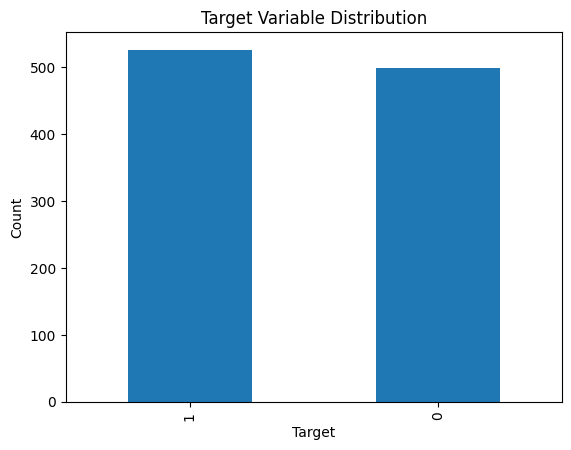

In [9]:
plt.figure()
df["target"].value_counts().plot(kind="bar")
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.show()


# Feature Correlation

In [10]:
correlation = df.corr()
correlation["target"].sort_values(ascending=False)


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

* Correlation Analysis Insights

    - Chest pain type (cp) and maximum heart rate achieved (thalach) show the strongest positive correlation with heart disease.
    - Exercise-induced angina (exang) and ST depression (oldpeak) have strong negative correlation, indicating higher risk.
    - Age and sex also contribute to risk but with lower correlation strength.
    - These insights guide feature selection and risk score construction in later stages.


# Age vs Target

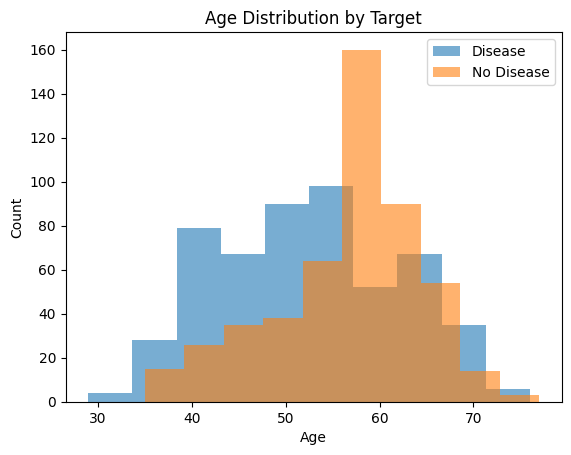

In [11]:
plt.figure()
plt.hist(df[df["target"] == 1]["age"], alpha=0.6, label="Disease")
plt.hist(df[df["target"] == 0]["age"], alpha=0.6, label="No Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Target")
plt.legend()
plt.show()


# Key Insights

* Key Insights from Data Exploration

    - The dataset contains approximately 1026 samples with no significant missing values.
    - The target variable is relatively balanced.
    - Age, cholesterol, and maximum heart rate show noticeable correlation with heart disease.
    - Initial exploration suggests suitability for risk-based modeling rather than binary classification only.
